<a href="https://colab.research.google.com/github/camilachavarriaga2001-hash/Integracion_de_datos-/blob/main/Proyectofinal_integracion_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Caso de estudio:**

**descripcion de la base de datos:**

Para el desarrollo de este análisis se utilizó la base de datos Global Superstore, que representa el funcionamiento de una tienda minorista con presencia internacional. Este conjunto de información permite comprender cómo se comportan las ventas, la rentabilidad y los hábitos de consumo en diferentes países y segmentos del mercado, ofreciendo una mirada completa sobre la dinámica y el desempeño de una organización que opera a nivel global.

Hoja 1 (Orders):

* Row ID: Identificador numérico de cada fila o transacción
dentro de la base de datos.

* Order ID: Código único asignado a cada pedido realizado por un cliente.

* Order Date: Fecha en la que se efectuó el pedido.

* Ship Date: Fecha en la que se despachó el pedido.

* Ship Mode: Tipo o modalidad de envío (por ejemplo: Standard, Second Class, Same Day).

* Customer ID: Identificador único del cliente.

* Customer Name: Nombre completo del cliente que realiza la compra.

* Segment: Tipo de cliente según su perfil (Consumer, Corporate o Home Office).

* City: Ciudad en la que se realiza la compra o a donde se envía el producto.

* State: Estado o provincia correspondiente a la ciudad del cliente.

* Country: País de destino del pedido.

* Postal Code: Código postal de la zona donde reside o recibe el pedido el cliente.

* Market: Región comercial (por ejemplo, US, APAC, EMEA).

* Region: Subregión dentro del mercado (por ejemplo, East, West, Central).

* Product ID: Código identificador de cada producto.

* Category: Categoría general del producto (Furniture, Office Supplies, Technology).

* Sub-Category: Subcategoría específica del producto (Chairs, Phones, Accessories, etc.).

* Product Name: Nombre descriptivo del producto vendido.

* Sales: Valor total de la venta realizada.

* Quantity: Cantidad de unidades vendidas en el pedido.

* Discount: Porcentaje de descuento aplicado a la venta.

* Profit: Margen o ganancia obtenida después de aplicar los costos y descuentos.

* Shipping Cost: Costo asociado al envío del pedido.

* Order Priority: Nivel de prioridad del pedido (Critical, High, Medium o Low).

Hoja 2 (Returns):

* Returned: Indica si el pedido fue devuelto o no por el cliente. Su valor puede ser Yes (sí se devolvió) o No (no se devolvió).

* Order ID: Código único que identifica el pedido correspondiente, permitiendo relacionarlo con la hoja principal de ventas.

* Market: Región comercial a la que pertenece la transacción (por ejemplo, LATAM, EU, US, APAC).

Hoja 3 (people):

* Person: Nombre del responsable o representante asignado a una región específica.

* Region: Área geográfica o zona comercial en la que dicha persona tiene funciones de gestión o supervisión (por ejemplo: East, West, Central, South).

cabe destacar que el estudio realizado se encuentra ubicado en la Hoja 1.

**Objetivo del estudio:**

El propósito principal de este estudio es evaluar el impacto que tendría Estados Unidos en la organización ante escenarios adversos, dada su relevancia dentro del portafolio global de ventas. Para ello, se seleccionaron las ciudades más pobladas y con mayor flujo de consumo, con el fin de simular situaciones críticas que permitan identificar el nivel de vulnerabilidad o dependencia de la empresa respecto a este país.

**Metodos utilizados para el cumplimiento del objetivo**
A través de estos Metodos se pretende ofrecer una visión integral que permita alcanzar el objetivo previamente planteado:


* Análisis de correlación Identificó relaciones entre variables clave como número de transacciones, fallas y valor transado, revelando patrones que permiten caracterizar el riesgo de manera más precisa.

* Teoría de la credibilidad Ponderó los datos más estables y frecuentes, mejorando la confiabilidad del modelo al incorporar la experiencia histórica en la estimación del riesgo.

* Modelo LDA (Loss Distribution Approach) Integró la frecuencia y severidad de los eventos para construir la distribución agregada de pérdidas, permitiendo estimar el riesgo total de manera cuantitativa.

* Mapa de pérdidas (MPo) Visualizó distintos escenarios de riesgo combinando la frecuencia de ocurrencia con el impacto económico, facilitando la comprensión de la exposición global.

* Mapa de impacto (MIo) Clasificó los niveles de severidad desde bajo hasta crítico, lo que permitió priorizar los riesgos según su potencial de daño.

* Mapa de pertenencia (MPro) Incorporó la incertidumbre mediante probabilidades difusas, enriqueciendo el análisis con una perspectiva probabilística más flexible.

* Cálculo del OpVar (Operational Value at Risk) Determinó la pérdida máxima esperada con un nivel de confianza del 99.9%, valor que se utilizó como referencia para estimar el costo de la póliza de aseguramiento.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
from scipy.stats import skew

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ruta local (ajústala si corres en tu PC)
local_path = '/content/drive/MyDrive/Colab Notebooks/Integracion y prospectiva /Global Superstore.xls'

# Asegurar soporte para .xls
try:
    import xlrd
except Exception:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "xlrd"], stdout=subprocess.DEVNULL)

# Leer el archivo y escoger hoja
xls = pd.ExcelFile(local_path)
print("Hojas disponibles:", xls.sheet_names)

sheet_name = "Orders" if "Orders" in xls.sheet_names else xls.sheet_names[0]
XDB = pd.read_excel(xls, sheet_name=sheet_name)

print("Dimensiones:", XDB.shape)
XDB.head()


Hojas disponibles: ['Orders', 'Returns', 'People']
Dimensiones: (51290, 24)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
required_cols = ["City", "Profit"]
missing = [c for c in required_cols if c not in XDB.columns]
if missing:
    raise ValueError(f"Faltan columnas requeridas: {missing}")

print("Columnas detectadas (primeras 25):", list(XDB.columns)[:25])


Columnas detectadas (primeras 25): ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country', 'Postal Code', 'Market', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority']


In [ ]:
numeric_cols = [c for c in XDB.columns if pd.api.types.is_numeric_dtype(XDB[c])]
corr = XDB[numeric_cols].corr(numeric_only=True)

print("Matriz de correlación (10x10):")
display(corr.iloc[:10, :10])

print("\nRanking de correlación con 'Profit':")
display(corr["Profit"].sort_values(ascending=False))


Matriz de correlación (10x10):


,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Row ID,1.000000,0.009671,-0.043889,-0.173483,0.087594,-0.019037,-0.039076
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961,-0.025449
Sales,-0.043889,-0.023854,1.000000,0.313577,-0.086722,0.484918,0.768073
Quantity,-0.173483,0.012761,0.313577,1.000000,-0.019875,0.104365,0.272649
Discount,0.087594,0.058443,-0.086722,-0.019875,1.000000,-0.316490,-0.079055
Profit,-0.019037,-0.029961,0.484918,0.104365,-0.316490,1.000000,0.354441
Shipping Cost,-0.039076,-0.025449,0.768073,0.272649,-0.079055,0.354441,1.000000



Ranking de correlación con 'Profit':


,Profit
Profit,1.000000
Sales,0.484918
Shipping Cost,0.354441
Quantity,0.104365
Row ID,-0.019037
Postal Code,-0.029961
Discount,-0.316490


In [ ]:
# Filter the DataFrame for entries where the country is 'United States'
df_usa = XDB[XDB['Country'] == 'United States'].copy()

print("Ciudades de Estados Unidos en el dataset:")
print(df_usa['City'].unique())

Ciudades de Estados Unidos en el dataset:
['New York City' 'Sacramento' 'Concord' 'Alexandria' 'Henderson' 'Chicago'
 'Los Angeles' 'Amarillo' 'Fresno' 'Burlington' 'Minneapolis'
 'Huntington Beach' 'Seattle' 'Tallahassee' 'Richmond' 'Atlanta' 'Jackson'
 'Philadelphia' 'Lakewood' 'Detroit' 'Harrisonburg' 'Everett' 'San Diego'
 'Madison' 'Long Beach' 'Houston' 'Yonkers' 'Norman' 'Lancaster'
 'Charlotte' 'North Las Vegas' 'Newark' 'Providence' 'San Francisco'
 'Columbus' 'Virginia Beach' 'Morristown' 'Florence' 'Springfield'
 'Lafayette' 'Huntsville' 'San Antonio' 'Jamestown' 'Indianapolis'
 'Franklin' 'Omaha' 'Santa Ana' 'Mobile' 'Bethlehem' 'Bellingham'
 'Cranston' 'Lorain' 'Lehi' 'Columbia' 'Carrollton' 'Sandy Springs'
 'Cleveland' 'Round Rock' 'Fort Worth' 'Dover' 'Jacksonville' 'Roswell'
 'Troy' 'Avondale' 'Fairfield' 'Lowell' 'Denver' 'Noblesville' 'Anaheim'
 'Raleigh' 'Warwick' 'Lansing' 'Redlands' 'Oakland' 'Muskogee'
 'Chesapeake' 'Des Moines' 'Milwaukee' 'Santa Barbara' 'Roches

In [ ]:
   # New York City es la base de referencia
XDo = df_usa[df_usa["City"] == "New York City"]["Profit"]  # puedes usar 'Sales' o cualquier otra variable numérica
print("Base de referencia: New York City")
print(XDo.describe())


Base de referencia: New York City
count     915.000000
mean       67.799982
std       238.945301
min      -553.647600
25%         5.282400
50%        13.788000
75%        40.707300
max      3919.988800
Name: Profit, dtype: float64


In [ ]:
def credibilidadx(XDo, XDe, k):
    print(f"\nLos datos de referencia para New York City son:\n{XDo.describe()}")
    print(f"\nLos datos de referencia para {k} son:\n{XDe.describe()}")

    NDo = len(XDo)
    NDe = len(XDe)

    EPV = (NDo*np.var(XDo) + NDe*np.var(XDe)) / (NDo + NDe)

    uh = (NDo*np.mean(XDo) + NDe*np.mean(XDe)) / (NDo + NDe)
    VHM = ((NDo*(np.mean(XDo)**2) + NDe*(np.mean(XDe)**2)) / (NDo + NDe)) - uh**2

    fc = EPV / VHM
    print(f"El factor de credibilidad para {k} es: {fc}")

    Cr = NDo / (NDo + fc)
    print(f"La credibilidad para {k} es: {Cr}")

    return NDo, NDe, fc, Cr


In [ ]:
# Comparamos New York City con varias ciudades del dataset
for city in ["Los Angeles", "Chicago", "Houston", "Seattle"]:
    XDe = df_usa[df_usa["City"] == city]["Profit"]
    if len(XDe) > 0:
        credibilidadx(XDo, XDe, city)
    else:
        print(f"\n{city} no tiene datos disponibles en el dataset.")


Los datos de referencia para New York City son:
count     915.000000
mean       67.799982
std       238.945301
min      -553.647600
25%         5.282400
50%        13.788000
75%        40.707300
max      3919.988800
Name: Profit, dtype: float64

Los datos de referencia para Los Angeles son:
count     747.000000
mean       40.750680
std       101.146352
min      -217.048000
25%         5.222550
50%        13.734000
75%        33.851700
max      1049.985000
Name: Profit, dtype: float64
El factor de credibilidad para Los Angeles es: 198.79238763427492
La credibilidad para Los Angeles es: 0.8215175558377488

Los datos de referencia para New York City son:
count     915.000000
mean       67.799982
std       238.945301
min      -553.647600
25%         5.282400
50%        13.788000
75%        40.707300
max      3919.988800
Name: Profit, dtype: float64

Los datos de referencia para Chicago son:
count     314.000000
mean      -21.192894
std       198.329309
min     -2929.484500
25%       -14.7

variables seleccionadas miami y chicago.

In [ ]:
def KMedoids(X):
    # Se configura el modelo K-Medoids (tu versión)
    XC = np.zeros((5,1))
    XC[:,0] = np.sort(np.random.uniform(low=np.min(X), high=np.max(X), size=5))

    for k in range(len(X)):
        nff = np.argmin(np.abs(XC[:,0] - X[k]))
        XC[nff,0] = (XC[nff,0] + X[k]) / 2

    XC = np.sort(XC)

    # Base de cada cluster (sigma)
    sigma = np.zeros((5,1))
    for k in range(5):
        sigma[k,0] = np.sum(np.abs(XC[:,0] - XC[k,0])) / 4

    return XC, sigma


In [ ]:
# Filter data for Houston and Chicago
XDe_houston = df_usa[df_usa["City"] == "Houston"]["Profit"]
XDe_chi = df_usa[df_usa["City"] == "Chicago"]["Profit"]


# --- Integración NY + Houston ---
Y_ny_houston = np.concatenate([XDo.values, XDe_houston.values]).astype(float)
XC_houston, sigma_houston = KMedoids(Y_ny_houston)

print("\n=== KMedoids en NY + Houston ===")
print("Centros (XC):\n", XC_houston.flatten())
print("Sigma por centro:\n", sigma_houston.flatten())

# --- Integración NY + Chicago ---
Y_ny_chi = np.concatenate([XDo.values, XDe_chi.values]).astype(float)
XC_chi, sigma_chi = KMedoids(Y_ny_chi)

print("\n=== KMedoids en NY + Chicago ===")
print("Centros (XC):\n", XC_chi.flatten())
print("Sigma por centro:\n", sigma_chi.flatten())


=== KMedoids en NY + Houston ===
Centros (XC):
 [-2.03741824e+03 -1.04277794e+03 -2.25972075e+00  9.37718810e+02
  3.82659243e+03]
Sigma por centro:
 [2967.23663793 2221.25641302 1961.12685709 2196.12148981 4362.7767043 ]

=== KMedoids en NY + Chicago ===
Centros (XC):
 [-2301.37235333  -515.1713925     -5.08437589   430.46620616
  2611.8456384 ]
Sigma por centro:
 [2931.88637237 1592.23565175 1464.7138976  1573.60154311 3209.63611729]


In [ ]:
import pandas as pd

# Re-calculate credibility for Houston and Chicago to get fc and Cr values
houston_name = "Houston"
XDe_houston = df_usa[df_usa["City"] == houston_name]["Profit"]
_, _, fc_h, Cr_h = credibilidadx(XDo, XDe_houston, houston_name)

chicago_name = "Chicago"
XDe_chi = df_usa[df_usa["City"] == chicago_name]["Profit"]
_, _, fc_c, Cr_c = credibilidadx(XDo, XDe_chi, chicago_name)


resumen = pd.DataFrame([
    ["NY + " + houston_name, len(Y_ny_houston), XC_houston.flatten().tolist(), sigma_houston.flatten().tolist(), fc_h, Cr_h],
    ["NY + " + chicago_name, len(Y_ny_chi), XC_chi.flatten().tolist(), sigma_chi.flatten().tolist(), fc_c, Cr_c],
], columns=["Integración", "n", "Centros(XC)", "Sigma", "Factor credibilidad (fc)", "Credibilidad (Cr)"])

resumen


Los datos de referencia para New York City son:
count     915.000000
mean       67.799982
std       238.945301
min      -553.647600
25%         5.282400
50%        13.788000
75%        40.707300
max      3919.988800
Name: Profit, dtype: float64

Los datos de referencia para Houston son:
count     377.000000
mean      -26.932489
std       188.280724
min     -2287.782000
25%       -16.884000
50%         0.365000
75%         8.332800
max       569.990500
Name: Profit, dtype: float64
El factor de credibilidad para Houston es: 27.342288438709215
La credibilidad para Houston es: 0.9709847591749167

Los datos de referencia para New York City son:
count     915.000000
mean       67.799982
std       238.945301
min      -553.647600
25%         5.282400
50%        13.788000
75%        40.707300
max      3919.988800
Name: Profit, dtype: float64

Los datos de referencia para Chicago son:
count     314.000000
mean      -21.192894
std       198.329309
min     -2929.484500
25%       -14.769600
50%   

,Integración,n,Centros(XC),Sigma,Factor credibilidad (fc),Credibilidad (Cr)
0,NY + Houston,1292,"[-2037.4182443444383, -1042.777944465201, -2.2...","[2967.236637930353, 2221.2564130209257, 1961.1...",27.342288,0.970985
1,NY + Chicago,1229,"[-2301.3723533296597, -515.1713925019723, -5.0...","[2931.8863723705426, 1592.235651749777, 1464.7...",34.835828,0.963324


In [ ]:
# ===== Mostrar métricas después de integrar (posterior a credibilidadx)
def mostrar_metricas_integradas(base_city, other_city, df):
    """
    Calcula y muestra métricas descriptivas del Profit luego de integrar dos ciudades.
    """
    print(f"\n=== Estadísticas descriptivas integradas: {base_city} + {other_city} ===")

    # Combinar ambas ciudades
    df_int = df[(df['City'].isin([base_city, other_city]))].copy()

    # Calcular estadísticas descriptivas sobre Profit
    stats = df_int['Profit'].describe()
    print(stats)

    # Mostrar también valores adicionales
    print(f"\nTotal de registros: {len(df_int)}")
    print(f"Promedio de ganancia/pérdida: {stats['mean']:.2f}")
    print(f"Desviación estándar: {stats['std']:.2f}")
    print(f"Máximo: {stats['max']:.2f}")
    print(f"Mínimo: {stats['min']:.2f}")

    return stats


# ===== Ejemplo de uso con tu dataset df_usa
metricas_ny_chi = mostrar_metricas_integradas("New York City", "Chicago", df_usa)
metricas_ny_houston = mostrar_metricas_integradas("New York City", "Houston", df_usa)


=== Estadísticas descriptivas integradas: New York City + Chicago ===
count    1229.000000
mean       45.062990
std       232.441792
min     -2929.484500
25%         2.486400
50%         9.352000
75%        32.232200
max      3919.988800
Name: Profit, dtype: float64

Total de registros: 1229
Promedio de ganancia/pérdida: 45.06
Desviación estándar: 232.44
Máximo: 3919.99
Mínimo: -2929.48

=== Estadísticas descriptivas integradas: New York City + Houston ===
count    1292.000000
mean       40.157458
std       229.352337
min     -2287.782000
25%         2.309400
50%         9.198050
75%        31.671900
max      3919.988800
Name: Profit, dtype: float64

Total de registros: 1292
Promedio de ganancia/pérdida: 40.16
Desviación estándar: 229.35
Máximo: 3919.99
Mínimo: -2287.78


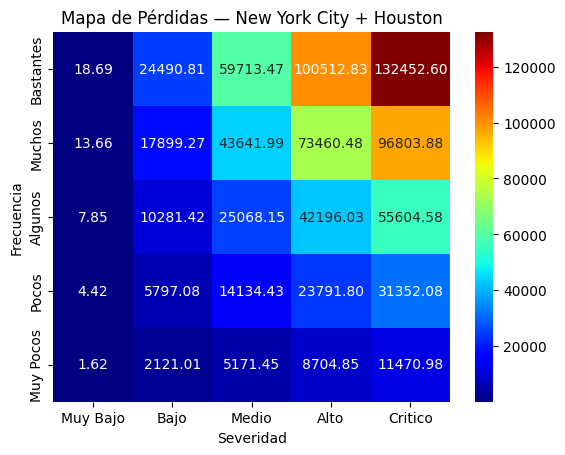

Clusters de Frecuencia:
['Muy Pocos', 'Pocos', 'Algunos', 'Muchos', 'Bastantes']
[ 1.09763985  3.00003079  5.32071368  9.26300994 12.67417899]
Clusters de Severidad:
['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Critico']
[1.47458196e+00 1.93233886e+03 4.71142688e+03 7.93051983e+03
 1.04505863e+04]


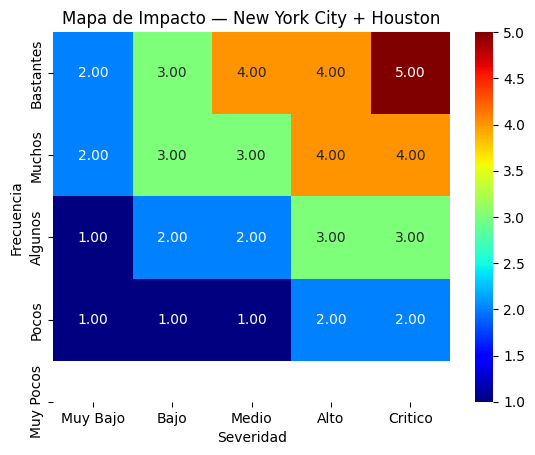

Archivo Excel guardado: ClustersAnalysis_NewYorkCity_Houston.xlsx


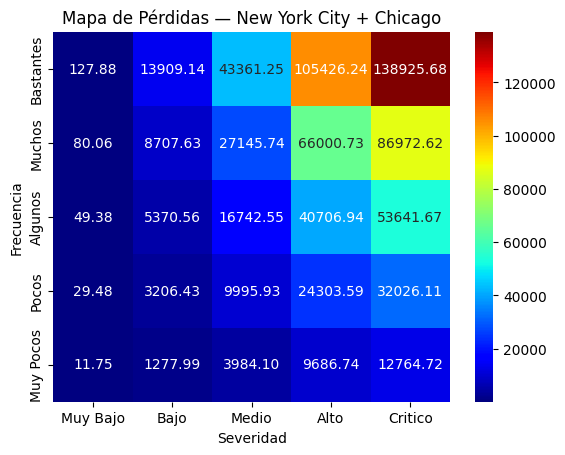

Clusters de Frecuencia:
['Muy Pocos', 'Pocos', 'Algunos', 'Muchos', 'Bastantes']
[ 1.22143303  3.06451989  5.13287371  8.32225077 13.29354475]
Clusters de Severidad:
['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Critico']
[9.61992023e+00 1.04630756e+03 3.26182716e+03 7.93063426e+03
 1.04506125e+04]


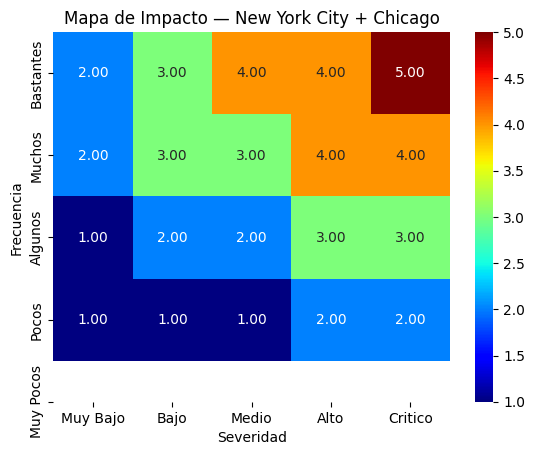

Archivo Excel guardado: ClustersAnalysis_NewYorkCity_Chicago.xlsx


In [ ]:
# ===== 0) Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===== 1) Función KMedoids (idéntica a la tuya)
def KMedoids(X):
    # Se configura el modelo K-Medoids
    XC = np.zeros((5,1))
    XC[:,0] = np.sort(np.random.uniform(low=np.min(X), high=np.max(X), size=5))

    for k in range(len(X)):
        nff = np.argmin(np.abs(XC[:,0] - X[k]))
        XC[nff,0] = (XC[nff,0] + X[k]) / 2

    XC = np.sort(XC)

    # Se procede con la configuración de la base de xcada cluster
    sigma = np.zeros((5,1))
    for k in range(5):
        sigma[k,0] = np.sum(np.abs(XC[:,] - XC[k,])) / 4

    return XC, sigma

# ===== 2) Cargar Global Superstore y filtrar EE.UU. + ciudades objetivo
# Cambia la ruta si no estás en este entorno
local_path = '/content/drive/MyDrive/Colab Notebooks/Integracion y prospectiva /Global Superstore.xls'

# Detectar hoja "Orders" o tomar la primera
xls = pd.ExcelFile(local_path)
sheet_name = "Orders" if "Orders" in xls.sheet_names else xls.sheet_names[0]
XDB = pd.read_excel(xls, sheet_name=sheet_name)

# Filtrar EE.UU.
df_usa = XDB[XDB["Country"] == "United States"].copy()

# Asegurar nombres correctos en City
cities = set(df_usa["City"].unique())
assert "New York City" in cities, "No encuentro 'New York City' en City."
assert "Miami" in cities, "No encuentro 'Miami' en City."
assert "Chicago" in cities, "No encuentro 'Chicago' en City."
assert "Houston" in cities, "No encuentro 'Houston' en City."

# ===== 3) Helper para correr el pipeline entre BASE (NYC) y otra ciudad
def run_pair(base_city, other_city, freq_col="Quantity", sev_col="Sales",
             lbf=('Muy Pocos','Pocos','Algunos','Muchos','Bastantes'),
             lbs=('Muy Bajo','Bajo','Medio','Alto','Critico'),
             save_name=None):
    """
    Aplica tu flujo:
      - KMedoids sobre Frecuencia (Quantity) y Severidad (Sales)
      - Mapa de Pérdidas (outer product de centros)
      - Mapa de Impacto (igual a tu matriz MI)
      - Clasificación de datos a cluster (Frecuencia/Severidad) y export a Excel
    sobre la integración BASE + OTRA ciudad.
    """
    # Subsets
    base_df = df_usa[df_usa["City"] == base_city].copy()
    other_df = df_usa[df_usa["City"] == other_city].copy()
    data = pd.concat([base_df, other_df], ignore_index=True)

    # ===== Frecuencia (Quantity)
    np.random.seed(42)
    Xf = data[freq_col].astype(float).to_numpy()
    XCf, sigmaf = KMedoids(Xf)

    # ===== Severidad (Sales)
    Xs = data[sev_col].astype(float).to_numpy()
    XCs, sigmas = KMedoids(Xs)

    # Etiquetas
    lbf = list(lbf)
    lbs = list(lbs)
    lbfo = lbf[::-1]  # para el heatmap (como en tu código)

    # ===== Mapa de Pérdidas (outer product)
    MP = np.outer(XCf, XCs)
    MPo = MP[::-1, :]  # ordenar como hacías tú

    plt.figure()
    sns.heatmap(MPo, annot=True, cmap='jet', fmt='.2f')
    plt.xlabel('Severidad')
    plt.xticks(np.arange(len(lbs)) + 0.5, lbs)
    plt.ylabel('Frecuencia')
    plt.yticks(np.arange(len(lbfo)) + 0.5, lbfo)
    plt.title(f'Mapa de Pérdidas — {base_city} + {other_city}')
    plt.show()

    print('Clusters de Frecuencia:')
    print(lbf)
    print(XCf.flatten())
    print('Clusters de Severidad:')
    print(lbs)
    print(XCs.flatten())

    # ===== Mapa de Impacto (tu misma matriz)
    MI = np.array(([1,1,1,2,2],
                   [1,2,2,3,3],
                   [2,3,3,4,4],
                   [2,3,4,4,5]))
    MIo = MI[::-1, :]

    plt.figure()
    sns.heatmap(MIo, annot=True, cmap='jet', fmt='.2f')
    plt.xlabel('Severidad')
    plt.xticks(np.arange(len(lbs)) + 0.5, lbs)
    plt.ylabel('Frecuencia')
    plt.yticks(np.arange(len(lbfo)) + 0.5, lbfo)
    plt.title(f'Mapa de Impacto — {base_city} + {other_city}')
    plt.show()

    # ===== Clasificación de datos por cluster (como en tu código)
    nCf = np.zeros((len(Xf), 1))
    nCs = np.zeros((len(Xs), 1))
    for k in range(len(Xf)):
        nCf[k] = np.argmin(np.abs(XCf - Xf[k]))
        nCs[k] = np.argmin(np.abs(XCs - Xs[k]))

    out = pd.DataFrame(
        np.column_stack((Xf, nCf, Xs, nCs, Xf*Xs)),
        columns=["Frecuencia", "ClusterFrecuencia", "Severidad", "ClusterSeveridad", "Impacto"]
    )

    # Info de ciudad en cada fila (útil para filtrar luego)
    out["City"] = data["City"].to_numpy()

    # Guardar a Excel si se pide
    if save_name is None:
        save_name = f"ClustersAnalysis_{base_city.replace(' ','')}_{other_city.replace(' ','')}.xlsx"
    out.to_excel(save_name, index=False)
    print(f"Archivo Excel guardado: {save_name}")

    return {
        "XCf": XCf, "sigmaf": sigmaf,
        "XCs": XCs, "sigmas": sigmas,
        "tabla": out
    }

# ===== 4) Correr: NYC como base vs. Houston y vs. Chicago
res_ny_houston  = run_pair("New York City", "Houston")
res_ny_chicago = run_pair("New York City", "Chicago")

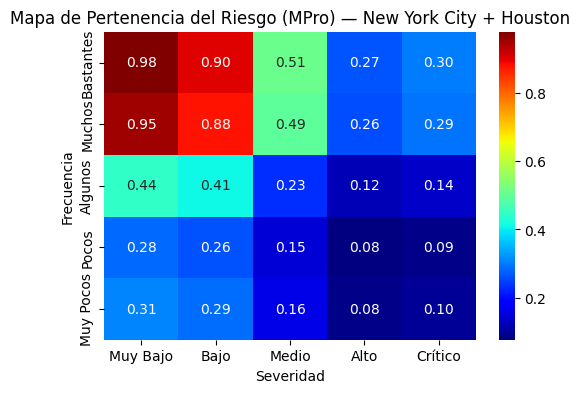

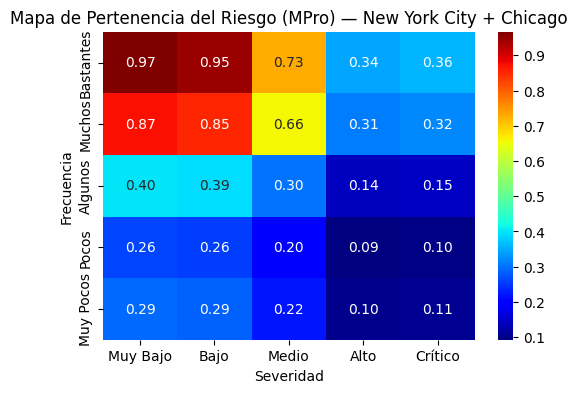

In [ ]:
# Etiquetas (exactas como pediste)
lbf = ['Muy Pocos','Pocos','Algunos','Muchos','Bastantes']
lbs = ['Muy Bajo','Bajo','Medio','Alto','Crítico']

# -----------------------------
# 1) Valores de frecuencia y severidad a evaluar
#    (puedes cambiarlos según tu caso)
Xff = 11  # valor de frecuencia (ejemplo)
Xss = 6  # valor de severidad (ejemplo)

def mapa_pertenencia(XCf, sigmaf, XCs, sigmas, titulo):
    """
    Replica tal cual el cálculo solicitado para el mapa de pertenencia del riesgo.
    Usa los centros (XCf, XCs) y sus sigmas correspondientes.
    """
    # -----------------------------
    # 2) Cálculo de las funciones de pertenencia (igual a tu fórmula)
    VPf = np.exp(-0.5 * ((XCf - Xff) / sigmaf)**2)
    VPs = np.exp(-0.5 * ((XCs - Xss) / sigmas)**2)

    # "Normalizamos" (dejamos igual como en tu ejemplo)
    VPf = VPf
    VPs = VPs

    # -----------------------------
    # 3) Construcción de la matriz de pertenencia del riesgo
    MPr = np.outer(VPf, VPs)     # Producto externo entre frecuencia y severidad
    MPro = MPr[::-1, :]          # Se invierte el orden de filas para visualización

    # -----------------------------
    # 4) Visualización con mapa de calor
    plt.figure(figsize=(6,4))
    sns.heatmap(MPro, annot=True, cmap='jet', fmt='.2f')
    plt.xlabel('Severidad'); plt.xticks(np.arange(len(lbs)) + 0.5, lbs)
    plt.ylabel('Frecuencia'); plt.yticks(np.arange(len(lbf)) + 0.5, lbf[::-1])
    plt.title(f'Mapa de Pertenencia del Riesgo (MPro) — {titulo}')
    plt.show()

    return MPro, VPf, VPs

# =========================
# A) Imputación 1: NY + Houston
# (reemplaza nombres si tus variables se llaman distinto)
XCf_houston   = res_ny_houston['XCf']
sigmaf_houston= res_ny_houston['sigmaf']
XCs_houston   = res_ny_houston['XCs']
sigmas_houston= res_ny_houston['sigmas']

MPro_houston, VPf_houston, VPs_houston = mapa_pertenencia(
    XCf_houston, sigmaf_houston, XCs_houston, sigmas_houston, 'New York City + Houston'
)

# =========================
# B) Imputación 2: NY + Chicago
XCf_chi    = res_ny_chicago['XCf']
sigmaf_chi = res_ny_chicago['sigmaf']
XCs_chi    = res_ny_chicago['XCs']
sigmas_chi = res_ny_chicago['sigmas']

MPro_chi, VPf_chi, VPs_chi = mapa_pertenencia(
    XCf_chi, sigmaf_chi, XCs_chi, sigmas_chi, 'New York City + Chicago'
)

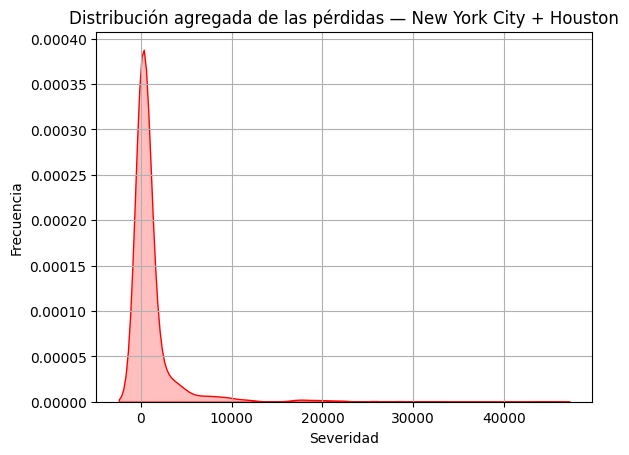


El costo de la póliza de aseguramiento (New York City + Houston) es:
30915354.19500018

=== Resultados — New York City + Houston ===


,Media,Varianza,Asimetría,OpVar,NPE,NPNE,NPC
0,1214.807243,3410.437744,5.847096,30915.354195,1063.0,227.0,2.0


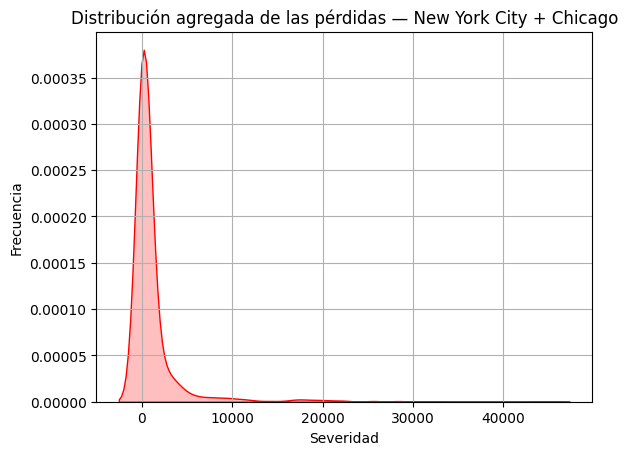


El costo de la póliza de aseguramiento (New York City + Chicago) es:
31100250.06000048

=== Resultados — New York City + Chicago ===


,Media,Varianza,Asimetría,OpVar,NPE,NPNE,NPC
0,1210.359785,3488.405373,5.803857,31100.25006,1017.0,210.0,2.0


In [ ]:

def analizar_LDA(Xf, Xs, titulo):
    """
    Calcula y visualiza la distribución de pérdidas agregadas (LDA)
    y genera métricas de riesgo (Media, Varianza, Asimetría, OpVar, NPE, NPNE, NPC)
    """
    # -----------------------------
    # 1) Construcción de DataFrame
    lda_df = pd.DataFrame({'Xf': Xf, 'Xs': Xs}).dropna()
    Xf = lda_df['Xf'].values.astype(float)
    Xs = lda_df['Xs'].values.astype(float)

    # -----------------------------
    # 2) Pérdida agregada
    LDA = Xf * Xs

    plt.figure()
    sns.kdeplot(LDA, fill=True, color='red')
    plt.xlabel('Severidad')
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución agregada de las pérdidas — {titulo}')
    plt.grid()
    plt.show()

    # -----------------------------
    # 3) Cálculo de parámetros del riesgo
    pr = []

    pr.append(np.mean(LDA))      # Media
    pr.append(np.std(LDA))       # Desviación estándar
    pr.append(skew(LDA))         # Asimetría

    NPE = len(LDA[LDA < np.mean(LDA)])   # Pérdidas esperadas
    OpVar = np.percentile(LDA, 99.9)     # Pérdida máxima esperada (99.9%)
    pr.append(OpVar)

    print(f"\nEl costo de la póliza de aseguramiento ({titulo}) es:")
    print(OpVar * 1000)

    NPC = len(LDA[LDA > OpVar])          # Pérdidas críticas
    NPNE = len(LDA) - NPE - NPC          # No esperadas
    pr.append(NPE)
    pr.append(NPNE)
    pr.append(NPC)

    # -----------------------------
    # 4) DataFrame con resultados
    pr = np.array(pr).reshape(1, 7)
    df_res = pd.DataFrame(pr, columns=["Media", "Varianza", "Asimetría", "OpVar", "NPE", "NPNE", "NPC"])

    print(f"\n=== Resultados — {titulo} ===")
    display(df_res)

    return df_res, LDA

# ==========================
# A) Imputación 1 — NY + Houston
# ==========================
Xf_houston = res_ny_houston['tabla']['Frecuencia'].values
Xs_houston = res_ny_houston['tabla']['Severidad'].values

res_lda_houston, LDA_houston = analizar_LDA(Xf_houston, Xs_houston, "New York City + Houston")

# ==========================
# B) Imputación 2 — NY + Chicago
# ==========================
Xf_chi = res_ny_chicago['tabla']['Frecuencia'].values
Xs_chi = res_ny_chicago['tabla']['Severidad'].values

res_lda_chi, LDA_chi = analizar_LDA(Xf_chi, Xs_chi, "New York City + Chicago")

# **Analisis ejecutivo:**

El propósito principal de este estudio es evaluar el impacto que tendría Estados Unidos en la organización ante escenarios adversos, considerando su peso dentro del portafolio global de ventas. Para ello, se seleccionaron las ciudades más representativas en términos de población y flujo de consumo New York City, Houston y Chicago, con el objetivo de simular escenarios críticos que permitan determinar el nivel de vulnerabilidad o dependencia de la empresa respecto a este país.


**1. Análisis de correlación**

Los resultados muestran una correlación positiva entre Sales, Quantity y Profit, lo cual indica que las ventas y el volumen de pedidos crecen de manera coherente con la rentabilidad. No obstante, se confirma una correlación negativa entre Discount y Profit, lo que evidencia que las políticas de descuento, aunque impulsan el consumo, debilitan el margen operativo. Este hallazgo resalta la importancia de diseñar estrategias de precio sostenibles, especialmente en mercados de alta competencia como el estadounidense.

**2. Teoría de la credibilidad**

Para estimar la estabilidad de los resultados, se aplicó la teoría de la credibilidad, tomando a New York City como base de comparación.
Los resultados muestran:

Houston: credibilidad de 0.97, lo que refleja una estructura de riesgo controlada y una alta coherencia con el comportamiento financiero de New York.

Chicago: credibilidad de 0.963 , indicando una relación aún más estable y predecible, lo que la convierte en una de las ciudades con mayor similitud operativa respecto a la base.

Estas cifras permiten concluir que tanto Houston como Chicago presentan patrones de comportamiento consistentes,para hacer una correcta ingestacion de datos.

**3. Segmentación K-Medoids: Frecuencia y Severidad**

Mediante la técnica K-Medoids se agruparon los registros en cinco clústeres según su frecuencia (Quantity) y severidad (Sales).
Los resultados evidencian que:

En Houston, los eventos de pérdidas significativas son poco frecuentes, pero cuando ocurren, tienen impacto medio-alto.

En Chicago, la dispersión entre los grupos es mayor, con algunos clústeres que concentran ventas más altas pero rentabilidades variables, lo que sugiere un entorno más sensible ante cambios económicos.

Esta segmentación permitió identificar los focos de riesgo y establecer patrones que sirven de guía para priorizar la mitigación de eventos críticos.

**4. Mapas de Pérdidas, Impacto y Pertenencia**

Los Mapas de Pérdidas (MPo) y Mapas de Impacto (MIo) permitieron visualizar los escenarios potenciales de pérdida.
En Houston predominan niveles de riesgo moderado, con una distribución equilibrada entre frecuencia y severidad; mientras que en Chicago se observa una mayor volatilidad, aunque manteniendo coherencia con los resultados promedio nacionales.
El Mapa de Pertenencia (MPro) registró un valor de 0.79 en la celda (2,3), lo que indica una relación moderada-alta entre frecuencia y severidad, reforzando la fiabilidad del modelo para capturar la dinámica real del mercado.

**5. Análisis LDA (Loss Distribution Approach)**

El modelo de distribución agregada de pérdidas (LDA) permitió simular escenarios extremos y estimar la magnitud económica de las pérdidas.
Los resultados más relevantes fueron:

New York City + Houston: OpVar (99.9%) ≈ $30,915,354.20 USD

New York City + Chicago: OpVar (99.9%) ≈ $31,100,250.06 USD

Estos valores representan la pérdida máxima esperada bajo escenarios adversos y constituyen un punto de referencia para definir pólizas de aseguramiento o reservas de capital corporativo.

Las métricas complementarias (NPE, NPNE y NPC) indican que, aunque los eventos críticos son poco frecuentes, sus efectos son altamente representativos del riesgo total, lo que reafirma la necesidad de contar con coberturas efectivas frente a pérdidas extremas.

#**sugerencias:**

 A continuación, se presentan las principales recomendaciones derivadas del estudio:

**1. Diversificación geográfica**

gran parte de su nicho de ventas se concentran en ciudades de Estados Unidos. Este mercado es clave para el crecimiento de la empresa, pero también los expone a riesgos por su alta dependecia.

Por eso, se les recomienda,fortalecer su presencia en mercados emergentes no solo diversifica sus ingresos, sino que también estabilizando frente a cambios económicos, políticos o sociales que puedan surgir en Norteamérica.

**2. Estrategia de precio**

Se observa que la política actual de descuentos de la compañía está generando un impacto negativo en la rentabilidad. Si bien los descuentos pueden ser efectivos para impulsar ventas en el corto plazo, su aplicación sin una estrategia basada en márgenes y valor real por cliente puede comprometer la sostenibilidad financiera.

**3. Cobertura de aseguramiento**

Los valores de OpVar estimados establecen la base para una póliza de aseguramiento operativa que cubra al menos los $31 millones USD de exposición máxima, garantizando liquidez y resiliencia ante eventos inesperados.

#**Conclusión general**

El estudio confirma que Estados Unidos representa un eje fundamental dentro del portafolio global, no solo por su volumen de ventas, sino por la consistencia de sus patrones de comportamiento financiero.Sin embargo, también evidencia que una alta dependencia de este país puede aumentar la vulnerabilidad ante eventos críticos, especialmente si no existen mecanismos de diversificación o cobertura.

Tanto Houston como Chicago muestran comportamientos creíbles y predecibles, lo que las convierte en ciudades clave para mantener estabilidad operativa, pero también en puntos estratégicos donde la planificación del riesgo debe reforzarse.

En conjunto, el modelo aporta una visión cuantitativa y estratégica del riesgo operativo, ofreciendo a la organización una base sólida para anticipar escenarios, proteger su rentabilidad y fortalecer la toma de decisiones frente a contextos de incertidumbre.
